# Data of a two vertical bodies with magnetization

This notebook generates a toal field anomaly (TFA) and an amplitude of the anomalous magnetic field (AMF) data of a two vertical bodies in a regular grid.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

### Auxiliary functions

In [69]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

### The model

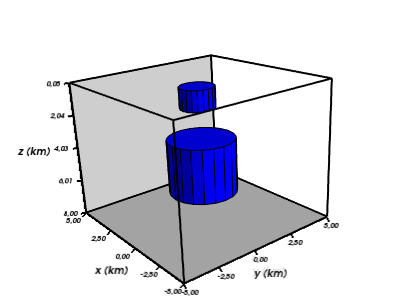

In [70]:
img(filename='../synthetic_data/vbodies/vbodies_true.png')

### Importing model and grid

In [71]:
with open('../synthetic_data/vbodies/vbodies_model.pickle') as w:
        vbodies_model = pickle.load(w)
with open('../synthetic_data/grids/regular_grid_50x50_10km2.pickle') as w:
        regular_grid = pickle.load(w)

### Generating data

In [72]:
vbodies_data = dict()

In [77]:
# TFA data
vbodies_data['tfa'] = polyprism.tf(regular_grid['x'], regular_grid['y'], regular_grid['z'], \
                           vbodies_model['prisms'], vbodies_model['inc'], vbodies_model['dec']) # predict data

amp_noise = 3.
vbodies_data['tfa_obs'] = vbodies_data['tfa'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['shape'][0]*regular_grid['shape'][1]) # noise corrupted tfa data

In [78]:
# AMF data
vbodies_data['bx'] = polyprism.bx(regular_grid['x'], regular_grid['y'], regular_grid['z'], vbodies_model['prisms'])
vbodies_data['by'] = polyprism.by(regular_grid['x'], regular_grid['y'], regular_grid['z'], vbodies_model['prisms'])
vbodies_data['bz'] = polyprism.bz(regular_grid['x'], regular_grid['y'], regular_grid['z'], vbodies_model['prisms'])

vbodies_data['amf'] = np.sqrt(vbodies_data['bx']**2. + vbodies_data['by']**2. + vbodies_data['bz']**2.)

amp_noise = 3.
vbodies_data['amf_obs'] = vbodies_data['amf'] + np.random.normal(loc=0., scale=amp_noise,
                               size=regular_grid['shape'][0]*regular_grid['shape'][1]) # noise corrupted amf data

### Data ploting

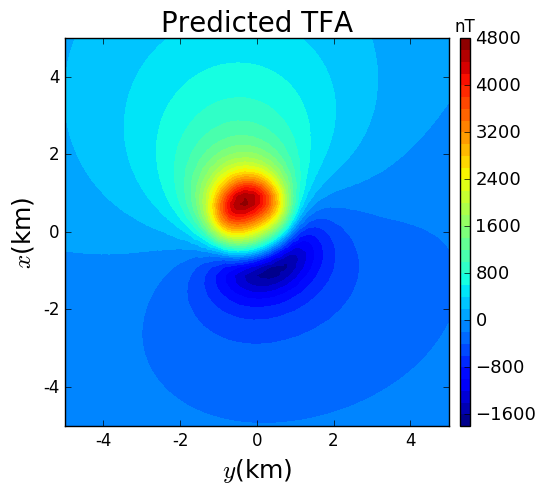

In [79]:
plt.figure(figsize=(6,5))
plt.title('Predicted TFA', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['tfa'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig('../synthetic_data/vbodies/pre_tfa.png', dpi=300)
plt.show()

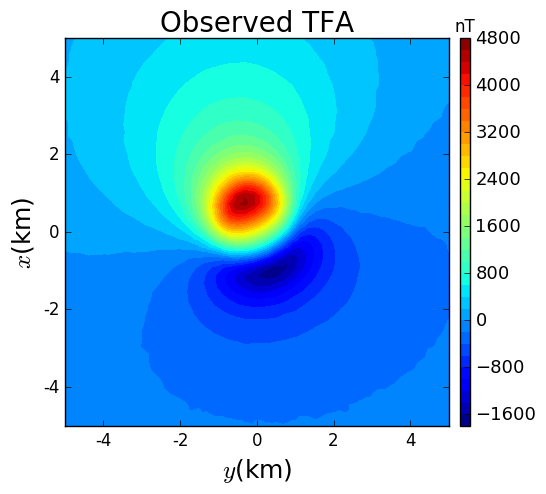

In [80]:
plt.figure(figsize=(6,5))
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['tfa_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.savefig('../synthetic_data/vbodies/obs_tfa.png', dpi=300)
plt.show()

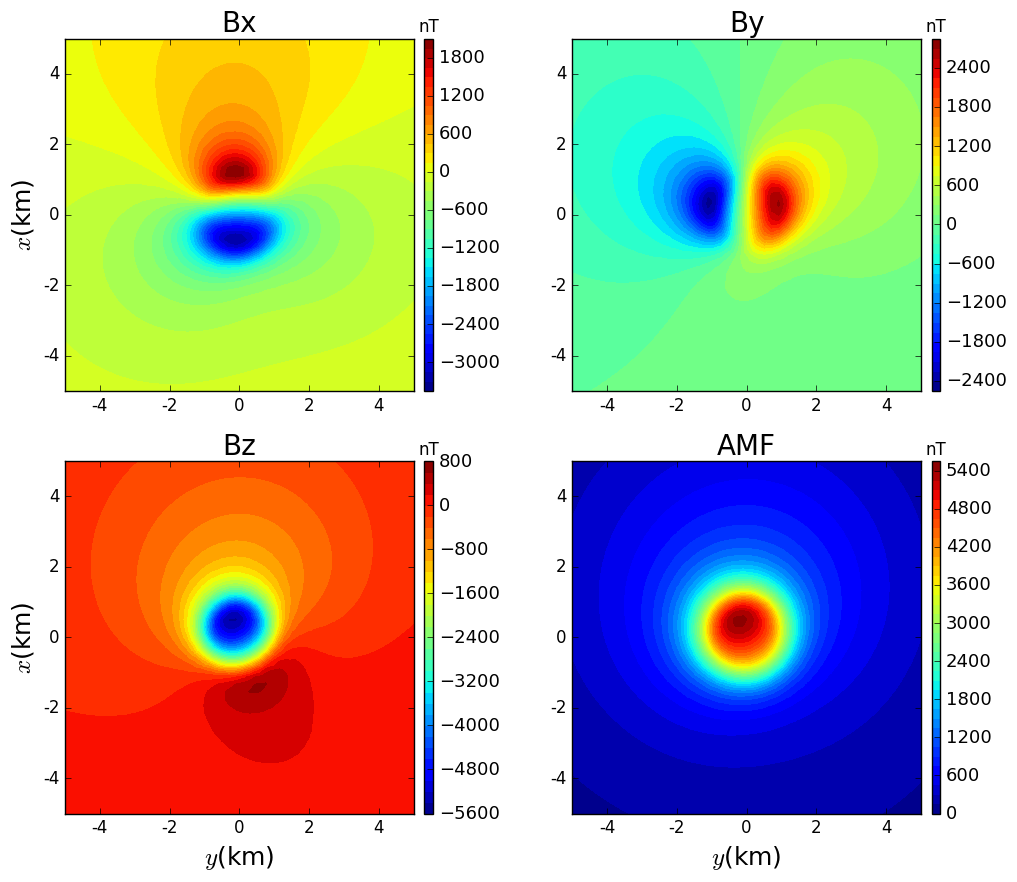

In [81]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.title('Bx', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['bx'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.subplot(2,2,2)
plt.title('By', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['by'], 40, cmap='jet').ax.tick_params(labelsize=12)
#plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.subplot(2,2,3)
plt.title('Bz', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['bz'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.subplot(2,2,4)
plt.title('AMF', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['amf'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
#plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)

plt.savefig('../synthetic_data/vbodies/bcomponents_amf.png', dpi=300)
plt.show()

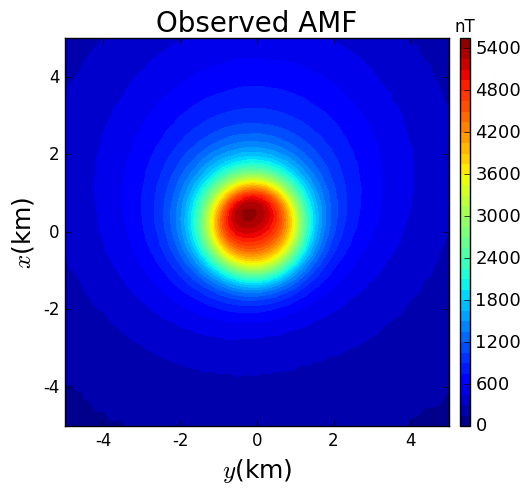

In [82]:
plt.figure(figsize=(6,5))
plt.title('Observed AMF', fontsize=20)
plt.tricontourf(regular_grid['y'], regular_grid['x'], vbodies_data['amf_obs'], 40, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
plt.ylim((np.min(regular_grid['x']), np.max(regular_grid['x'])))
plt.xlim((np.min(regular_grid['y']), np.max(regular_grid['y'])))
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
source.set_label('True source')
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('../synthetic_data/vbodies/obs_amf.png', dpi=300)
plt.show()

### Saving in an outer file

In [83]:
file_name = '../synthetic_data/vbodies/vbodies_data.pickle'
with open(file_name, 'w') as f:
    pickle.dump(vbodies_data, f)